# Chapter 4 신경망 학습  
**학습이란?**    
  
훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것  
손실 함수의 결괏값을 최소로 만드는 가중치 매개변수를 찾는 것이 학습의 목표

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 4.2.1 오차제곱합  
$ E = \frac{1}{2}\sum_{k}(y_k - t_k)^2 $  
  
여기서 $\frac{1}{2}$이 곱해진 이유는 **델타 규칙(Delta Rule)** 때문인데, 최적의 가중치를 찾아가는 최적화(Optimizer)에서 사용되는 경사하강법은 기울기를 기반으로 실시되며, 이 과정에서 발생할 수 있는 오류를 최소화시키기 위해서이다.

In [2]:
def sum_square_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [3]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# ex1) '2'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_square_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
# ex2) '7'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_square_error(np.array(y), np.array(t))

0.5975

첫 번째 예시가 두 번째 예시보다 손실 함수 값이 더 작으므로 더 정답에 가까움을 알 수 있습니다.

### 4.2.2 교차 엔트로피 오차  
$ E = -\sum_{k}{t_k}\log{y_k}$

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [6]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [7]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

### 4.2.3 미니배치 학습

크기가 매우 큰 데이터를 가지고 일일이 손실 함수를 계산하는 것은 비효율적입니다.  
이런 경우 데이터의 일부만 사용해 전체의 '근사치'를 구할 수 있습니다.  
이 일부를 **미니 배치** 라고 합니다. 

In [8]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

In [9]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)
    
print(x_train.shape)
print(t_train.shape)
t_train.size

(60000, 784)
(60000, 10)


600000

In [10]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

### 4.2.4 (배치용) 교차 엔트로피 오차 구하기

In [11]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size) # size = 행 x 열 크기
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [12]:
# 정답 레이블이 one-hot 인코딩이 아닐 떄 교차 엔트로피 오차 구하기
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size # 이 내용 한 번 더 보고 이해를 확실히 할 필요가 있음

## 4.3 수치 미분

### 4.3.1 미분

In [13]:
# 나쁜 구현의 예
def numerical_diff(f, x):
    h = 1e-50
    return (f(x + h) - f(x)) / h

In [15]:
# 오차를 개선한 예
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x + h) - f(x - h)) / (2 * h)

### 4.3.2 수치 미분의 예

$ y = 0.01x^2 + 0.1x $

In [16]:
def function_1(x):
    return 0.01*(x**2) + 0.1*x

In [17]:
import numpy as np
import matplotlib.pylab as plt

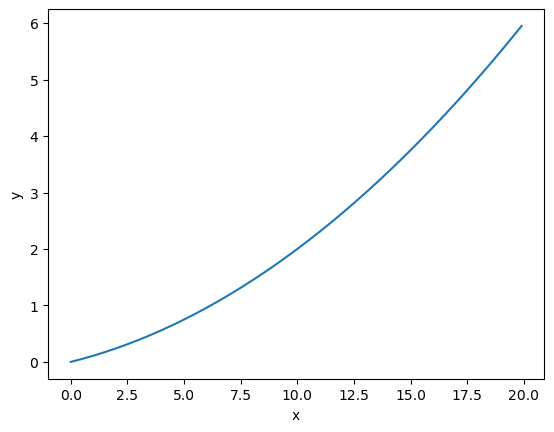

In [18]:
x  = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다 (20은 미포함)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.show()

In [19]:
numerical_diff(function_1, 5)

0.1999999999990898

In [21]:
numerical_diff(function_1, 10)

float

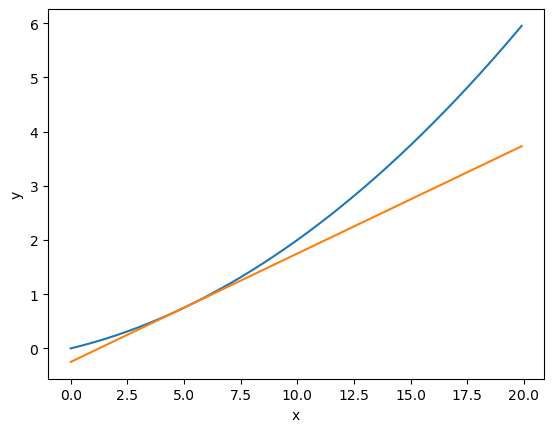

In [22]:
x  = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다 (20은 미포함)
y = function_1(x)
y_1 = numerical_diff(function_1, 5) * (x - 5) + function_1(5)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.plot(x, y_1)
plt.show()

### 4.3.3 편미분

$ f(x_0,x_1) = x_0^2 + x_1^2$

In [24]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2
    # 또는 return np.sum(x ** 2)
    # 인수 x는 넘파이 배열이라고 가정

문제 1 : $x_0 = 3, x_1 = 4$ 일 때, $x_0$에 대한 편미분을 구하라

In [27]:
def functino_tmp1(x0):
    return x0 * x0 + 4.0 ** 2.0

In [28]:
numerical_diff(functino_tmp1, 3.0)

6.00000000000378

문제 2 :$x_0 = 3, x_1 = 4$ 일 때, $x_1$에 대한 편미분을 구하라

In [29]:
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 4.4 기울기

In [30]:
def numerical_gradient(f, x):
    h = 1e-4 
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x + h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x - h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [32]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


### 4.4.1 경사법(경사하강법)

기울기를 잘 이용해 함수의 최솟값 (또는 가능한 가장 작은 값)을 찾으려는 것이 **경사법**입니다.  
현 위치에서 기울어진 방향으로 일정 거리만큼 이동합니다.  
그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 그 기울어진 방향으로 나아가기를 반복합니다.  
이렇게 해서 함수의 값을 점차 줄이는 것이 **경사법**입니다.

In [33]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

문제 : 경사법으로 $ f(x_0,x_1) = x_0^2 + x_1^2 $ 의 최솟값을 구하라.

In [35]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=0.1, step_num=100) # (0,0)에 근접한 답이 나옴

array([-6.11110793e-10,  8.14814391e-10])

In [36]:
# 학습률이 너무 큰 예 : lr=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=10.0, step_num=100) # 너무 큰 값으로 발산

array([-2.58983747e+13, -1.29524862e+12])

In [37]:
# 학습률이 너무 작은 예 : lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=1e-10, step_num=100) # 학습이 거의 되지 않음

array([-2.99999994,  3.99999992])

### 4.4.2 신경망에서의 기울기

신경망 학습에서도 가중치 매개변수에 대한 손실 함수의 기울기를 구해야합니다.  
*그렇게 최적의 매개변수를 구합니다.*

In [39]:
# 간단한 신경망을 예로 들어 실제로 기울기를 구하는 코드 구현
import sys, os
sys.path.append(os.pardir)
import numpy as np


def cross_entropy_error(y, t):
    if y.ndim == 1:
        y = y.reshape(1, y.size)
        t = t.reshape(1, t.size)
    
    # 훈련 데이터의 정답 레이블이 원-핫 벡터라면 인덱스로 변환    
    if t.size == y.size:
        t = np.argmax(t, axis=1)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def softmax(x):
    if x.ndim == 2:
        x = x - np.max(x, axis=1)
        y = np.exp(x) / np.sum(np.exp(x), axis=1)
        return y
        
    x = x - np.max(x) # overflow 방지
    return np.exp(x) / np.sum(np.exp(x))

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite']) # np.nditer 부분이 이해가 되지 않는다
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x + h)
        
        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x - h)
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        
        x[idx] = tmp_val
        it.iternext()
        
    return grad

In [40]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규 분포로 초기화 
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [41]:
net = simpleNet()
print(net.W) # 가중치 매개변수

[[ 0.13182416  1.26761494  1.53106017]
 [-0.56173596 -1.08868964 -1.73664134]]


In [42]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.42646787 -0.21925171 -0.6443411 ]


In [43]:
np.argmax(p)

1

In [44]:
t = np.array([0, 0, 1]) # 정답 레이블
net.loss(x ,t)

1.3279115652427902

In [45]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.19772765  0.24325414 -0.44098178]
 [ 0.29659147  0.36488121 -0.66147268]]


In [47]:
# 위에서 새로운 함수를 정의할 때 "def f(x):..." 문법을 사용했는데, 여기서는 람다 함수 사용
f = lambda w: net.loss(x ,t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.19772765  0.24325414 -0.44098178]
 [ 0.29659147  0.36488121 -0.66147268]]


## 4.5 학습 알고리즘 구현하기

## 신경망 학습의 절차  
  
### **전제**  
신경망에는 적응 가능한 가중치(W)와 편향(b)이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 것을 **학습**이라고 한다.  
  
### **1. 미니배치**  
훈련 데이터 중에서 일부를 무작위로 가져옵니다.  
이렇게 선별한 데이터를 미니배치라고 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표입니다.  
  
***손실 함수란?***  
신경망에서 최적의 매개변수를 찾기 위한 지표  
일반적으로 **오차제곱합**과 **교차 엔트로피 오차**를 사용합니다. 
  
### **2. 기울기 산출**  
손실 함수의 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구합니다.  
기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시합니다.  
  
### **3. 매개변수 갱신**  
가중치 매개변수르 기울기 방향으로 아주 조금씩 갱신합니다.  
  
### **4. 반복**  
1~3 단계를 반복합니다. 

In [1]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        

In [2]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [3]:
x = np.random.rand(100, 784) # 더미 입력 데이터 (100장 분량)
y = net.predict(x)
y.shape

(100, 10)

In [6]:
x = np.random.rand(100, 784) # 더미 입력 데이터 (100장 분량)
t = np.random.rand(100, 10 ) # 더미 정답 레이블 (100장 분량)

grads = net.numerical_gradient(x, t) # (기울기 계산)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


### 4.5.2 미니배치 학습 구현하기

In [10]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 성능 개선판!
    
    # 매개변수 갱신
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

### 4.5.3 시험 데이터로 평가하기

In [12]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1 epoch 당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 성능 개선판!
    
    # 매개변수 갱신
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1 epoch 당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_batch, t_batch)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | "
              + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.12, 0.101
train acc, test acc | 0.84, 0.7995
train acc, test acc | 0.84, 0.8816
train acc, test acc | 0.92, 0.9022
train acc, test acc | 0.92, 0.9111
train acc, test acc | 0.92, 0.9139
train acc, test acc | 0.97, 0.9199
train acc, test acc | 0.9, 0.9249
train acc, test acc | 0.9, 0.9276
train acc, test acc | 0.93, 0.9312
train acc, test acc | 0.92, 0.9331
train acc, test acc | 0.91, 0.936
train acc, test acc | 0.94, 0.9379
train acc, test acc | 0.97, 0.9394
train acc, test acc | 0.97, 0.9417
train acc, test acc | 0.98, 0.943
train acc, test acc | 0.94, 0.9453
